In [10]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

from results_path import DDPG_PATH, PPO_PATH

In [11]:
DDPG_PATH = "DDPG_MultiWaveAttenuationMergePOEnv-v0_0_2019-04-19_21-20-10_3zl8w0z"

In [12]:
result_path = '/headless/ray_results/multi_merge/' + DDPG_PATH + '/progress.csv'
save_path = '../result/MultiAgent/multi_merge_PPO_reward.png'

In [13]:
df = pandas.read_csv(result_path)

In [14]:
df.custom_metrics.values

array(['{}',
       "{'episode_total_reward_max': 128.82430614438658, 'episode_total_reward_min': 128.82430614438658, 'episode_total_reward_mean': 128.82430614438658}",
       "{'episode_total_reward_max': 128.82430614438658, 'episode_total_reward_min': 128.82430614438658, 'episode_total_reward_mean': 128.82430614438658}",
       "{'episode_total_reward_max': 129.0531438507242, 'episode_total_reward_min': 128.82430614438658, 'episode_total_reward_mean': 128.9387249975554}",
       "{'episode_total_reward_max': 129.0531438507242, 'episode_total_reward_min': 127.80193492026953, 'episode_total_reward_mean': 128.55979497179345}"],
      dtype=object)

In [17]:
df.episode_reward_mean

0          NaN
1    23.804327
2    23.804327
3    23.842724
4    23.823738
Name: episode_reward_mean, dtype: float64

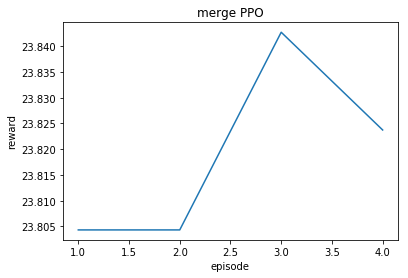

In [16]:
plt.title('merge PPO')
plt.ylabel('reward')
plt.xlabel('episode')
df.episode_reward_mean.plot()

In [ ]:
plt.savefig(save_path)